In [1]:
def first_fit_decreasing(items, bin_capacity):
    # 先按尺寸从大到小排序
    sorted_items = sorted(items, reverse=True)
    bins = []  # 用于存放所有箱子，每个箱子用一个列表表示
    for item in sorted_items:
        placed = False
        # 尝试将物品放入已有的箱子中
        for bin in bins:
            if sum(bin) + item <= bin_capacity:
                bin.append(item)
                placed = True
                break
        # 如果在所有已有箱子中都找不到合适的位置，则创建新箱子
        if not placed:
            bins.append([item])
    return bins

所需箱子数量: 2
箱子 1: [8, 2] （总尺寸: 10）
箱子 2: [4, 4, 1, 1] （总尺寸: 10）


In [2]:
def fibonacci_series(n):
    # 初始化 dp 数组，空间为 n+1 个元素
    dp = [0] * (n + 1)
    if n >= 1:
        dp[1] = 1
    #从第 2 项开始计算
    for i in range(2, n + 1):
        dp[i] = dp[i - 1] + dp[i - 2]
    return dp


斐波那契数列（从 F(0) 到 F(10)）:
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [4]:
import heapq

def manhattan(state, goal):
    distance = 0
    # 对于每个数字（不计算空格 0）
    for num in range(1, 9):
        current_index = state.index(num)
        goal_index = goal.index(num)
        # 计算当前位置 (row, col)
        current_row, current_col = divmod(current_index, 3)
        goal_row, goal_col = divmod(goal_index, 3)
        distance += abs(current_row - goal_row) + abs(current_col - goal_col)
    return distance

def get_neighbors(state):
    neighbors = []
    blank_index = state.index(0)
    r, c = divmod(blank_index, 3)
    # 定义移动方向：上、下、左、右
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dr, dc in moves:
        nr, nc = r + dr, c + dc
        if 0 <= nr < 3 and 0 <= nc < 3:
            new_index = nr * 3 + nc
            state_list = list(state)
            # 交换空位与目标数字
            state_list[blank_index], state_list[new_index] = state_list[new_index], state_list[blank_index]
            neighbors.append(tuple(state_list))
    return neighbors

def is_solvable(state):
    inv = 0
    lst = [x for x in state if x != 0]
    for i in range(len(lst)):
        for j in range(i + 1, len(lst)):
            if lst[i] > lst[j]:
                inv += 1
    return inv % 2 == 0

def a_star(initial, goal):
    if not is_solvable(initial):
        return None, None
    # 每个元素：(优先级, 当前代价, 当前状态)
    frontier = []
    heapq.heappush(frontier, (manhattan(initial, goal), 0, initial))
    came_from = {initial: None}
    cost_so_far = {initial: 0}

    while frontier:
        _, cost, current = heapq.heappop(frontier)
        if current == goal:
            # 回溯得到路径
            path = []
            while current is not None:
                path.append(current)
                current = came_from[current]
            return path[::-1], cost
        for neighbor in get_neighbors(current):
            new_cost = cost + 1
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + manhattan(neighbor, goal)
                heapq.heappush(frontier, (priority, new_cost, neighbor))
                came_from[neighbor] = current
    return None, None

def print_state(state):
    for i in range(0, 9, 3):
        print(state[i:i + 3])
    print()

找到解法，总步数为： 2
状态转换路径如下：
(1, 2, 3)
(4, 0, 6)
(7, 5, 8)

(1, 2, 3)
(4, 5, 6)
(7, 0, 8)

(1, 2, 3)
(4, 5, 6)
(7, 8, 0)



In [5]:
def solve_n_queens(n):
    solutions = []
    # board[i] 表示第 i 行皇后所在的列位置，初始设为 -1 表示未放置
    board = [-1] * n

    def is_valid(row, col):
        for r in range(row):
            # 同一列冲突或两点在同一斜线上
            if board[r] == col or abs(board[r] - col) == row - r:
                return False
        return True

    def backtrack(row):
        if row == n:
            # 注意要记录一份当前的解，由于 board 会不断更新，因此用 copy 记录
            solutions.append(board.copy())
            return
        # 遍历当前行的所有列，尝试放置皇后
        for col in range(n):
            if is_valid(row, col):
                board[row] = col      # 放置皇后
                backtrack(row + 1)      # 递归进入下一行
                board[row] = -1         # 撤销当前选择（回溯）

    backtrack(0)
    return solutions

def print_solution(board):
    n = len(board)
    for i in range(n):
        line = ""
        for j in range(n):
            if board[i] == j:
                line += "Q "
            else:
                line += ". "
        print(line)
    print()

In [ ]:
def gradient_descent(grad_func, init_x, learning_rate=0.1, num_iterations=100, tol=1e-6):
    x = init_x
    history = [x]
    for i in range(num_iterations):
        grad = grad_func(x)
        if abs(grad) < tol:
            print(f"提前结束：迭代 {i} 次时梯度 {grad:.6f} 小于容忍阈值")
            break
        x = x - learning_rate * grad
        history.append(x)
    return x, history



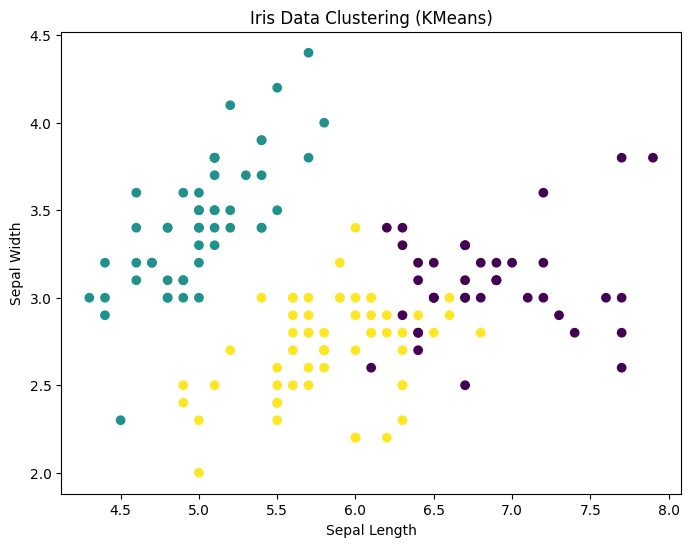

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 加载鸢尾花数据集（Iris）
iris = load_iris()
X = iris.data  # 4个特征的数据集

# 使用 KMeans 进行聚类（分为 3 类）
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# 绘制前两个特征（萼片长度和萼片宽度）的散点图
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", marker='o')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Data Clustering (KMeans)")
plt.show()


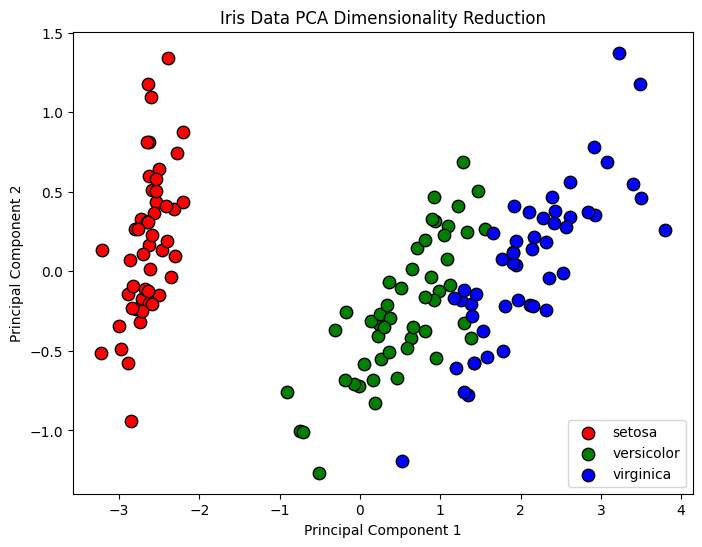

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# 加载鸢尾花数据
iris = load_iris()
X = iris.data     # 特征数据（4 维）
y = iris.target   # 标签（0,1,2三类）

# 将数据降至2维
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 根据类别绘制散点图
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
target_names = iris.target_names
for i, color, label in zip(range(3), colors, target_names):
    plt.scatter(X_reduced[y == i, 0],
                X_reduced[y == i, 1],
                color=color,
                label=label,
                edgecolor='k',
                s=80)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Iris Data PCA Dimensionality Reduction")
plt.legend()
plt.show()


# Review
## 心得
4个程序：deepseek的代码能力还是太超前了。最好还是用claude吧，幻觉最低。当然Gpt也够用了。
鸢尾花：没有上次的乳腺癌难
## 思路
已经写在程序注释中